<a href="https://colab.research.google.com/github/sudhannv/sudhannv/blob/main/SLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import tensorflow as tf
from matplotlib import pylab
from pylab import *

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving SLP_GMSL_CSV_1.csv to SLP_GMSL_CSV_1 (1).csv
Saving SLP_GMSL_CSV_2.csv to SLP_GMSL_CSV_2.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['SLP_GMSL_CSV_1.csv']), index_col='Date', parse_dates=True)
df_1=pd.read_csv(io.BytesIO(uploaded['SLP_GMSL_CSV_2.csv']))
# Dataset is now stored in a Pandas Dataframe
df.index.asfreq='MS'
df.sort_index(inplace= True)

df_1

,Date,SLP,Rise_in_avg_GMSL_mm,GMSL_uncertainty_mm
0,15-01-1948,1010.730,-63.9,9.3
1,15-02-1948,1010.731,-68.4,9.3
2,15-03-1948,1010.332,-70.5,9.3
3,15-04-1948,1010.138,-70.5,9.3
4,15-05-1948,1011.769,-69.2,9.3
...,...,...,...,...
787,15-08-2013,1014.243,71.6,8.8
788,15-09-2013,1013.911,68.8,8.8
789,15-10-2013,1012.598,66.4,8.9
790,15-11-2013,1010.834,59.7,9.0


In [ ]:
#to define columns individually
#SLP=df[1]
#GMSL=df[2]
#GMSL_uncertainity=df[3]
#type(df)
df.head()

,SLP
Date,
1948-01-15,1010.730
1948-02-15,1010.731
1948-03-15,1010.332
1948-04-15,1010.138
1948-05-15,1011.769


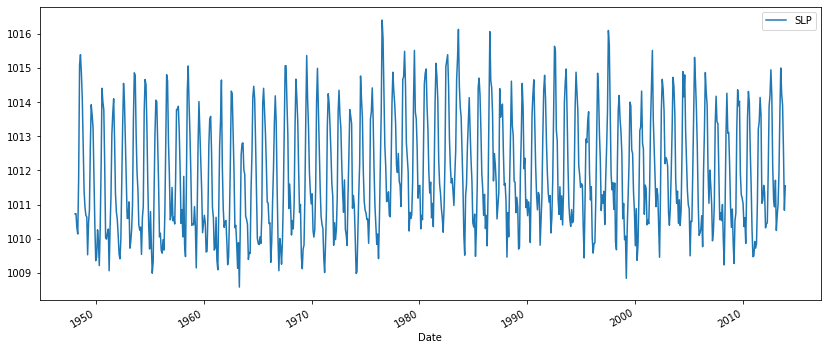

In [ ]:
df.plot(figsize=(20,8))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
import statsmodels as sm
import statsmodels.api as sm

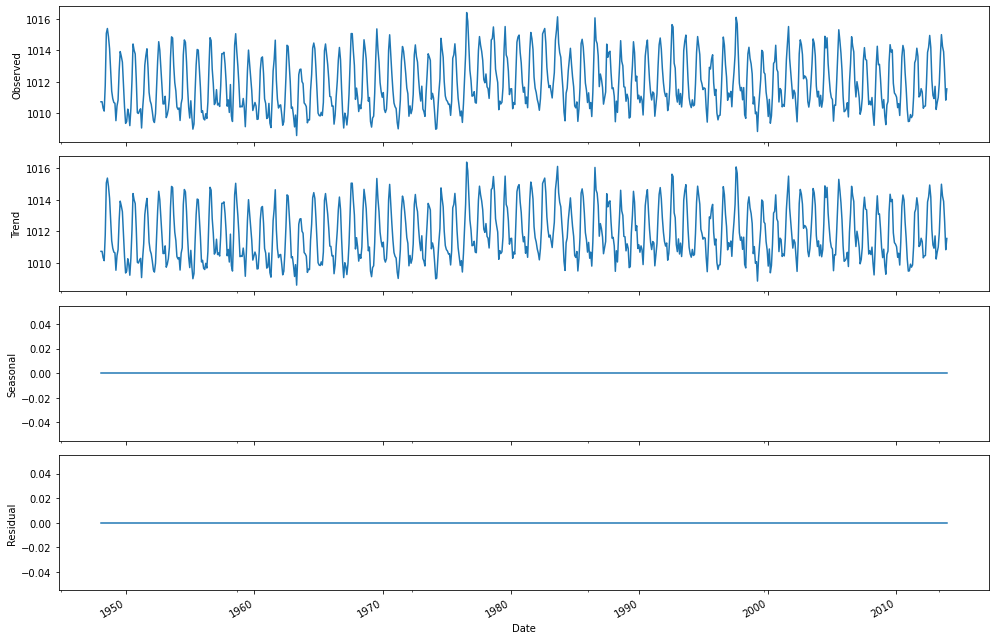

In [ ]:
# to view the above statement
#decompose_result = seasonal_decompose(df.SLP, model='multiplicative', freq=1)
#results = seasonal_decompose(df['SLP'])
#decompose_result.plot();

decompose_result = seasonal_decompose(df.SLP, model='additive', freq=1)
#sm.tsa.seasonal_decompose(df.asfreq('MS'), model = 'additive')
pylab.rcParams['figure.figsize'] = (14, 9)
#results = seasonal_decompose(df['SLP'])
resplot = decompose_result.plot();
resplot.savefig('Seasonal_Decompose.png', dpi=150)

In [ ]:
#to know the number of days data available, length (len of dataframe)
len(df)

792

In [ ]:
#train and test data (80 percent and 20 percent respectively, for length 0f 792, 80 percent is 696 months) 
train = df.iloc[:696]
test = df.iloc[696:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(),df.tail()

(                 SLP
 Date                
 1948-01-15  1010.730
 1948-02-15  1010.731
 1948-03-15  1010.332
 1948-04-15  1010.138
 1948-05-15  1011.769,                  SLP
 Date                
 2013-08-15  1014.243
 2013-09-15  1013.911
 2013-10-15  1012.598
 2013-11-15  1010.834
 2013-12-15  1011.550)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.27451733],
       [0.27464519],
       [0.22362869],
       [0.19882368],
       [0.40736479],
       [0.83122363],
       [0.87034906],
       [0.80322209],
       [0.7064314 ],
       [0.53624856]])

In [ ]:
scaled_train[:10]

array([[0.27451733],
       [0.27464519],
       [0.22362869],
       [0.19882368],
       [0.40736479],
       [0.83122363],
       [0.87034906],
       [0.80322209],
       [0.7064314 ],
       [0.53624856]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.27451733 0.27464519 0.22362869 0.19882368 0.40736479 0.83122363
 0.87034906 0.80322209 0.7064314  0.53624856 0.36082342 0.30034522]
Predict this y: 
 [[0.26838]]


In [ ]:
X.shape

(1, 12, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
y.shape

(1, 1)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
684/684 [==============================] - 5s 6ms/step - loss: 0.0371
Epoch 2/50
684/684 [==============================] - 4s 6ms/step - loss: 0.0124
Epoch 3/50
684/684 [==============================] - 4s 6ms/step - loss: 0.0099
Epoch 4/50
684/684 [==============================] - 4s 6ms/step - loss: 0.0091
Epoch 5/50
684/684 [==============================] - 4s 6ms/step - loss: 0.0108
Epoch 6/50
684/684 [==============================] - 4s 6ms/step - loss: 0.0088
Epoch 7/50
684/684 [==============================] - 4s 6ms/step - loss: 0.0077
Epoch 8/50
684/684 [==============================] - 4s 6ms/step - loss: 0.0072
Epoch 9/50
684/684 [==============================] - 4s 6ms/step - loss: 0.0072
Epoch 10/50
684/684 [==============================] - 4s 6ms/step - loss: 0.0067
Epoch 11/50
684/684 [==============================] - 4s 6ms/step - loss: 0.0067
Epoch 12/50
684/684 [==============================] - 4s 6ms/step - loss: 0.0068
Epoch 13/50
684/684 [====

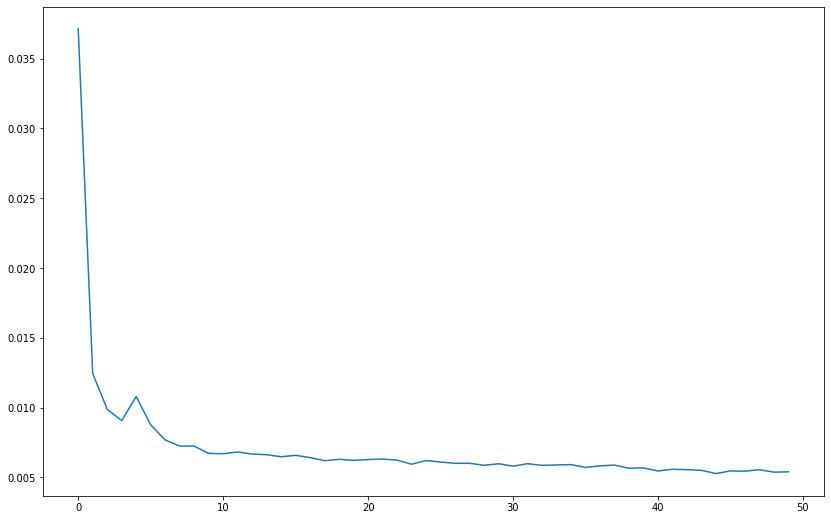

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
ast_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.18596706],
       [0.13564509],
       [0.16896635],
       [0.16852728],
       [0.2478962 ],
       [0.37286693],
       [0.50913566],
       [0.44706804],
       [0.37895256],
       [0.29534045],
       [0.19595614],
       [0.15420508]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.20163662])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.22586569], dtype=float32),
 array([0.19781864], dtype=float32),
 array([0.16524482], dtype=float32),
 array([0.17203152], dtype=float32),
 array([0.32961527], dtype=float32),
 array([0.5713481], dtype=float32),
 array([0.69315726], dtype=float32),
 array([0.68113244], dtype=float32),
 array([0.5678066], dtype=float32),
 array([0.40872], dtype=float32),
 array([0.27824447], dtype=float32),
 array([0.22117788], dtype=float32),
 array([0.18944074], dtype=float32),
 array([0.16242513], dtype=float32),
 array([0.14125684], dtype=float32),
 array([0.13810052], dtype=float32),
 array([0.2938154], dtype=float32),
 array([0.5273512], dtype=float32),
 array([0.65900123], dtype=float32),
 array([0.6508295], dtype=float32),
 array([0.53152096], dtype=float32),
 array([0.3715216], dtype=float32),
 array([0.26098946], dtype=float32),
 array([0.20609055], dtype=float32),
 array([0.17221934], dtype=float32),
 array([0.14805108], dtype=float32),
 array([0.13116074], dtype=float32),
 array([0.

In [ ]:
test.head()

,SLP,Predictions
Date,,
2006-01-15,1010.160,1010.349496
2006-02-15,1010.295,1010.130140
2006-03-15,1010.671,1009.875380
2006-04-15,1009.766,1009.928459
2006-05-15,1011.953,1011.160921


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


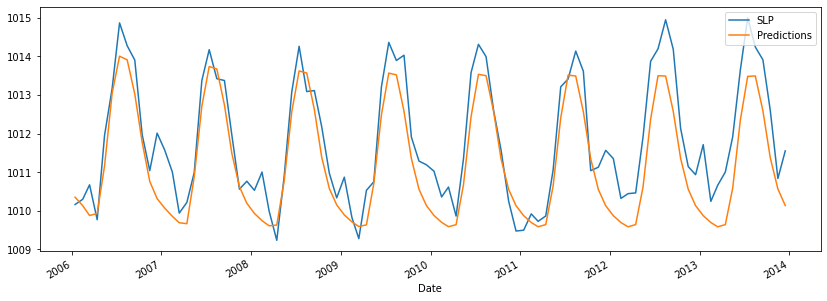

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['SLP'],test['Predictions']))
print(rmse)

0.8373834080580101
